First, make sure you can load, read and show an image from the dataset.

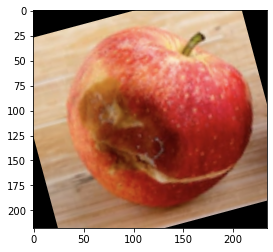

In [32]:
%matplotlib inline
# The line above is necesary to show Matplotlib's plots inside a Jupyter Notebook
# ~ thank you Ritu dhoot (https://stackoverflow.com/a/53079880)
import cv2 as cv
from matplotlib import pyplot as plt

#Import image
image = cv.imread("./dataset/train/rottenapples/rotated_by_15_Screen Shot 2018-06-07 at 2.50.52 PM.png")

#Show the image with matplotlib
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.show()

Try to isolate this apple, let's remove the background using GrabCut algorithm.

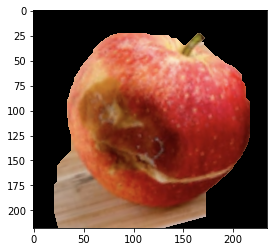

In [33]:
%matplotlib inline
import numpy as np

def grab(image):
    #Create a center of interest rectangle
    margin = .1
    (image_width, image_height, channels) = image.shape
    rect = (int(margin*image_width),int(margin*image_height),int((1-margin)*image_width),int((1-margin)*image_height))

    #Execute grab cut
    mask = np.zeros(image.shape[:2],np.uint8)
    bgdModel = np.zeros((1,65),np.float64)
    fgdModel = np.zeros((1,65),np.float64)
    cv.grabCut(image,mask,rect,bgdModel,fgdModel,3,cv.GC_INIT_WITH_RECT)
    mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
    return image*mask2[:,:,np.newaxis]

#Show the image with matplotlib
plt.imshow(cv.cvtColor(grab(image), cv.COLOR_BGR2RGB))
plt.show()

Now, make sure you can load train, test images from the dataset :

In [34]:
import random
from os import walk

def load_images(datasetpath):
    filenames = next(walk(datasetpath), (None, None, []))[2]
    # 💡 Comment the line above if you want to load the whole dataset
    filenames = random.sample(filenames, 100)
    return [grab(cv.imread('./{}/{}'.format(datasetpath, filename))) for filename in filenames]

test_fresh_apples = load_images("./dataset/test/freshapples")
test_rotten_apples = load_images("./dataset/test/rottenapples")
train_fresh_apples = load_images("./dataset/train/freshapples")
train_rotten_apples = load_images("./dataset/train/rottenapples")


Now, let's compate fresh orange histograms vs rotten orange histograms.

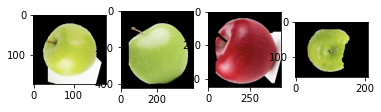

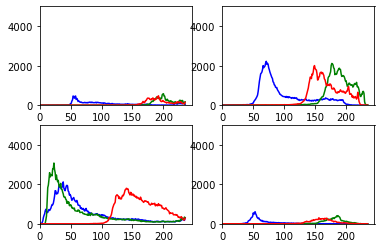

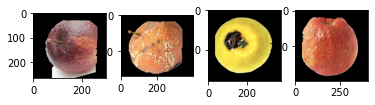

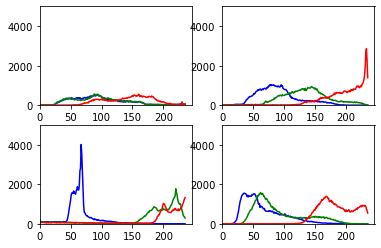

In [95]:
#Retreive and show histogram
color = ('b','g','r')
def retreive_hist(image):
    return [cv.calcHist([image],[i],None,[236],[10,246]) for i in [0,1,2]]

def show_hist(hist, xlim=246, ylim=5000):
    for i,col in enumerate(color):
        plt.plot(hist[i],color = col)
        plt.xlim([0,xlim])
        plt.ylim([0,ylim])

### FRESH APPLES

#Import fresh orange images
fresh = random.sample(train_fresh_apples, 4)

#Show images
plt.subplot(141)
plt.imshow(cv.cvtColor(fresh[0], cv.COLOR_BGR2RGB))
plt.subplot(142)
plt.imshow(cv.cvtColor(fresh[1], cv.COLOR_BGR2RGB))
plt.subplot(143)
plt.imshow(cv.cvtColor(fresh[2], cv.COLOR_BGR2RGB))
plt.subplot(144)
plt.imshow(cv.cvtColor(fresh[3], cv.COLOR_BGR2RGB))
plt.show()

fresh_hists = [retreive_hist(image) for image in fresh]

plt.subplot(221)
show_hist(fresh_hists[0])
plt.subplot(222)
show_hist(fresh_hists[1])
plt.subplot(223)
show_hist(fresh_hists[2])
plt.subplot(224)
show_hist(fresh_hists[3])
plt.show()

### ROTTEN APPLES

#Import rotten orange images
rotten = random.sample(train_rotten_apples, 4)

#Show images
plt.subplot(141)
plt.imshow(cv.cvtColor(rotten[0], cv.COLOR_BGR2RGB))
plt.subplot(142)
plt.imshow(cv.cvtColor(rotten[1], cv.COLOR_BGR2RGB))
plt.subplot(143)
plt.imshow(cv.cvtColor(rotten[2], cv.COLOR_BGR2RGB))
plt.subplot(144)
plt.imshow(cv.cvtColor(rotten[3], cv.COLOR_BGR2RGB))
plt.show()

rotten_hists = [retreive_hist(image) for image in rotten]

plt.subplot(221)
show_hist(rotten_hists[0])
plt.subplot(222)
show_hist(rotten_hists[1])
plt.subplot(223)
show_hist(rotten_hists[2])
plt.subplot(224)
show_hist(rotten_hists[3])
plt.show()

Try to reduce the size of these vectors (using max pooling for example).

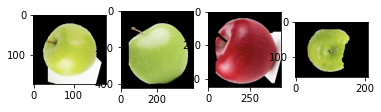

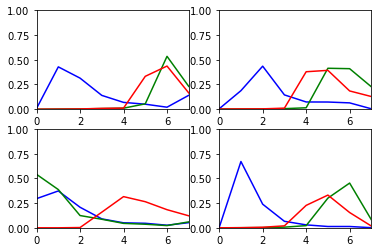

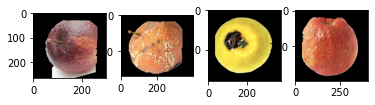

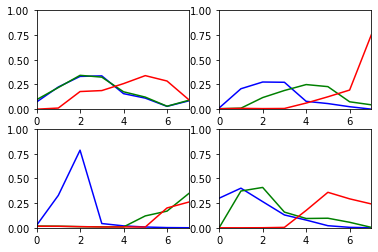

In [100]:
hvec_len = 8
def max_pool(arr, size, axis=0):
    return np.asarray([np.max(a) for a in np.array_split(arr, size, axis=axis)])

def normalize(arr):
    return arr / np.sqrt(np.sum(arr**2))

def hist_to_hvec(hist):
    # n = normalize(np.asarray([max_pool(c, 50) for c in hist]))
    # return np.asarray([c[25-hvec_len//2:25+hvec_len//2] for c in n])
    return normalize(np.asarray([max_pool(c, hvec_len) for c in hist]))


#Show images
plt.subplot(141)
plt.imshow(cv.cvtColor(fresh[0], cv.COLOR_BGR2RGB))
plt.subplot(142)
plt.imshow(cv.cvtColor(fresh[1], cv.COLOR_BGR2RGB))
plt.subplot(143)
plt.imshow(cv.cvtColor(fresh[2], cv.COLOR_BGR2RGB))
plt.subplot(144)
plt.imshow(cv.cvtColor(fresh[3], cv.COLOR_BGR2RGB))
plt.show()

fresh_hvecs = [hist_to_hvec(hist) for hist in fresh_hists]

plt.subplot(221)
show_hist(fresh_hvecs[0], xlim=hvec_len-1, ylim=1)
plt.subplot(222)
show_hist(fresh_hvecs[1], xlim=hvec_len-1, ylim=1)
plt.subplot(223)
show_hist(fresh_hvecs[2], xlim=hvec_len-1, ylim=1)
plt.subplot(224)
show_hist(fresh_hvecs[3], xlim=hvec_len-1, ylim=1)
plt.show()

#Show images
plt.subplot(141)
plt.imshow(cv.cvtColor(rotten[0], cv.COLOR_BGR2RGB))
plt.subplot(142)
plt.imshow(cv.cvtColor(rotten[1], cv.COLOR_BGR2RGB))
plt.subplot(143)
plt.imshow(cv.cvtColor(rotten[2], cv.COLOR_BGR2RGB))
plt.subplot(144)
plt.imshow(cv.cvtColor(rotten[3], cv.COLOR_BGR2RGB))
plt.show()

rotten_hvecs = [hist_to_hvec(hist) for hist in rotten_hists]

plt.subplot(221)
show_hist(rotten_hvecs[0], xlim=hvec_len-1, ylim=1)
plt.subplot(222)
show_hist(rotten_hvecs[1], xlim=hvec_len-1, ylim=1)
plt.subplot(223)
show_hist(rotten_hvecs[2], xlim=hvec_len-1, ylim=1)
plt.subplot(224)
show_hist(rotten_hvecs[3], xlim=hvec_len-1, ylim=1)
plt.show()


So good hist vectors look like :

In [109]:
# GOOD HISTOGRAMS (BGR FORMAT)
fresh_hvec_models = [
    # green / yellow fresh apples
    [
        [0, 0.5, 0.5, 0.1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0.3, 0.5, 0.3],
        [0, 0, 0, 0, 0.3, 0.5, 0.3, 0.3]
    ],
    # red fresh apples
    [
        [0.3, 0.3, 0.3, 0, 0, 0, 0, 0],
        [0.5, 0.3, 0.3, 0, 0, 0, 0, 0],
        [0, 0, 0, 0.3, 0.5, 0.3, 0.3, 0.3]
    ]
]

def dist(hvec):
    return np.min([np.linalg.norm(hvec-fresh_hvec_model) for fresh_hvec_model in fresh_hvec_models])

# HIST SCORE
def hist_score(image):
    return dist(hist_to_hvec(retreive_hist(image)))

### FRESH APPLES

print([dist(hvec) for hvec in fresh_hvecs])

### ROTTEN APPLES

print([dist(hvec) for hvec in rotten_hvecs])

[0.5328526713173385, 0.45398807799067403, 0.4313392506781854, 0.5345259759171903]
[0.8334995399825432, 0.9767187896330565, 0.7744402624653983, 0.7391401694586491]


Notice : looks like rotten orange have wider red and green histograms than fresh orange ones.

fresh image1 average 0.2899940344781039
fresh image2 average 0.24945979280798783
fresh image3 average 0.28188211409192576
fresh image4 average 0.43869130992193667


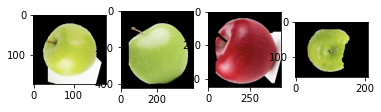

rotten image1 average 0.5936344519630756
rotten image2 average 0.5772199075402519
rotten image3 average 0.3724520407369121
rotten image4 average 0.5427197727721897


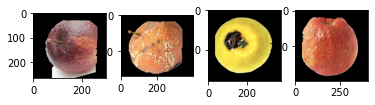

In [107]:
threshold = 1

def abs_dst(image):
    ddepth = cv.CV_16S
    kernel_size = 5
    # Remove noise by blurring with a Gaussian filter
    image_blur = cv.GaussianBlur(image, (3, 3), 0)
    # Convert the image to grayscale
    image_gray = cv.cvtColor(image_blur, cv.COLOR_BGR2GRAY)
    # Apply Laplace function
    dst = cv.Laplacian(image_gray, ddepth, ksize=kernel_size)
    # converting back to uint8
    return cv.convertScaleAbs(dst)

# LAPLACE SCORE

def laplace_score(image):
    arr = np.asarray(abs_dst(image)).flatten()
    filter_arr = arr > threshold
    newarr = arr[filter_arr]
    return newarr.mean() / 255

### FRESH ORANGES

print("fresh image1 average", laplace_score(fresh[0]))
print("fresh image2 average", laplace_score(fresh[1]))
print("fresh image3 average", laplace_score(fresh[2]))
print("fresh image4 average", laplace_score(fresh[3]))

#Show images
plt.subplot(141)
plt.imshow(cv.cvtColor(fresh[0], cv.COLOR_BGR2RGB))
plt.subplot(142)
plt.imshow(cv.cvtColor(fresh[1], cv.COLOR_BGR2RGB))
plt.subplot(143)
plt.imshow(cv.cvtColor(fresh[2], cv.COLOR_BGR2RGB))
plt.subplot(144)
plt.imshow(cv.cvtColor(fresh[3], cv.COLOR_BGR2RGB))
plt.show()

### ROTTEN ORANGES

print("rotten image1 average", laplace_score(rotten[0]))
print("rotten image2 average", laplace_score(rotten[1]))
print("rotten image3 average", laplace_score(rotten[2]))
print("rotten image4 average", laplace_score(rotten[3]))

#Show images
plt.subplot(141)
plt.imshow(cv.cvtColor(rotten[0], cv.COLOR_BGR2RGB))
plt.subplot(142)
plt.imshow(cv.cvtColor(rotten[1], cv.COLOR_BGR2RGB))
plt.subplot(143)
plt.imshow(cv.cvtColor(rotten[2], cv.COLOR_BGR2RGB))
plt.subplot(144)
plt.imshow(cv.cvtColor(rotten[3], cv.COLOR_BGR2RGB))
plt.show()

Now, let's plot our feature vector over the whole train dataset !

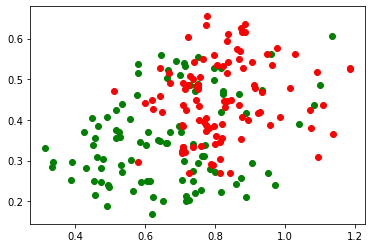

In [113]:
fresh_vectors = np.asarray([[hist_score(fresh), laplace_score(fresh)] for fresh in train_fresh_apples])
rotten_vectors = np.asarray([[hist_score(rotten), laplace_score(rotten)] for rotten in train_rotten_apples])

# scatter fresh vectors
xf, yf = fresh_vectors.T
plt.scatter(xf,yf,color="green")

# scatter rotten vectors
xr, yr = rotten_vectors.T
plt.scatter(xr,yr,color="red")

plt.show()
